In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/My Drive/Team15-Biointerphase/Dataset/habsos_water_predictions_4.csv')
print(df.head())
print(df.shape)

   latitude  longitude  depth      CATEGORY  CELLCOUNT  salinity  temperature  \
0  119.1058   280.4985    0.5  not observed        0.0      36.0         26.0   
1  118.5062   280.4835    0.5  not observed        0.0      36.0         26.0   
2  116.6833   280.1500    0.5      very low     2000.0      36.0         26.0   
3  117.1693   280.0150    0.5           low    30000.0      35.0         25.8   
4  117.1693   280.0150   30.5           low    16500.0      35.5         25.5   

       Date     Time  pressure  ...  oxygen_saturation   nitrate   b_bp700  \
0  723160.0  47100.0  0.498797  ...           0.758373  0.354752  0.025827   
1  723160.0  48300.0  0.498799  ...           0.758373  0.354752  0.025802   
2  722051.0  49500.0  0.498799  ...           0.758373  0.354752  0.025802   
3  720213.0  39900.0  0.498799  ...           0.758509  0.354752  0.025827   
4  720213.0  39900.0  0.498798  ...           0.759076  0.354752  0.025930   

        POC      CDOM  pH_insitu     pH25C  

In [4]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


NameError: name 'X_train' is not defined

In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (71252, 18)
X_test_scaled shape: (17814, 18)


In [ ]:
na_indices = df[df.isna().any(axis=1)].index
print(na_indices)

Index([84427, 84428, 84429, 84430, 84431, 84432, 84433, 84434, 84435, 84436,
       ...
       93695, 93696, 93697, 93698, 93699, 93700, 93701, 93702, 93703, 93704],
      dtype='int64', length=9278)


In [ ]:


na_indices = df[df.isna().any(axis=1)].index
print(na_indices)

# Display rows with NaN values
df.loc[na_indices]

Index([84427, 84428, 84429, 84430, 84431, 84432, 84433, 84434, 84435, 84436,
       ...
       93695, 93696, 93697, 93698, 93699, 93700, 93701, 93702, 93703, 93704],
      dtype='int64', length=9278)


,latitude,longitude,depth,CATEGORY,CELLCOUNT,salinity,temperature,Date,Time,pressure,...,oxygen_saturation,nitrate,b_bp700,POC,CDOM,pH_insitu,pH25C,TALK_LIAR,DIC_LIAR,pCO2_LIAR
84427,120.11367,274.318,0.2,not observed,0.0,26.88,14.8,736359.0,64320.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84428,120.11367,274.318,0.5,not observed,0.0,27.90,17.8,736377.0,58560.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84429,120.11367,274.318,0.5,not observed,0.0,31.20,21.1,736410.0,66180.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84430,120.11367,274.318,0.5,not observed,0.0,32.60,22.9,736418.0,55500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84431,120.11367,274.318,0.5,not observed,0.0,28.60,22.6,736431.0,55560.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303870,...,0.104636,0.354752,0.030541,0.036571,0.222254,0.631614,0.886923,0.552426,0.528540,0.652449
93701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303870,...,0.104695,0.354752,0.030640,0.036683,0.370829,0.631614,0.886923,0.552426,0.528747,0.652449
93702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608374,...,0.028950,0.354752,0.036578,0.032877,0.370829,0.631614,0.886923,0.552426,0.709432,0.654323
93703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608374,...,0.028969,0.357883,0.036841,0.033143,0.221006,0.631864,0.887499,0.552426,0.728701,0.652449


In [3]:
# Drop the 'CATEGORY' column
df = df.drop(columns=['CATEGORY'], errors='ignore')

# Drop columns containing "LIAR"
liar_columns = [col for col in df.columns if 'LIAR' in col]
df = df.drop(columns=liar_columns, errors='ignore')

# Display the updated DataFrame
print("Updated DataFrame after dropping 'CATEGORY' and 'LIAR' columns:")
print(df.head())
print("\nColumns in DataFrame after cleaning:", df.columns)


Updated DataFrame after dropping 'CATEGORY' and 'LIAR' columns:
   latitude  longitude  depth  CELLCOUNT  salinity  temperature      Date  \
0  119.1058   280.4985    0.5        0.0      36.0         26.0  723160.0   
1  118.5062   280.4835    0.5        0.0      36.0         26.0  723160.0   
2  116.6833   280.1500    0.5     2000.0      36.0         26.0  722051.0   
3  117.1693   280.0150    0.5    30000.0      35.0         25.8  720213.0   
4  117.1693   280.0150   30.5    16500.0      35.5         25.5  720213.0   

      Time  pressure  sigma_theta     chl_a    oxygen  oxygen_saturation  \
0  47100.0  0.498797     0.276912  0.017269  0.599598           0.758373   
1  48300.0  0.498799     0.276912  0.017269  0.599598           0.758373   
2  49500.0  0.498799     0.276912  0.017269  0.599598           0.758373   
3  39900.0  0.498799     0.273508  0.017492  0.599598           0.758509   
4  39900.0  0.498798     0.272052  0.016972  0.599598           0.759076   

    nitrate   b_

In [5]:
print(df.isna().sum())


# Drop 'Date' and 'Time' columns if not needed
#df = df.drop(columns=['Date', 'Time'], errors='ignore')

# Drop rows where 'CELLCOUNT' is NaN
df = df.dropna(subset=['CELLCOUNT'])

# show target and features
y = df['CELLCOUNT']
X = df.drop(columns=['CELLCOUNT'])

# show cleaned dataset info
print("Final DataFrame after removing duplicates and unneeded columns:")
print(df.head())
print("\nColumns in DataFrame after final cleaning:", df.columns)


latitude             4639
longitude            4639
depth                4639
CATEGORY             4639
CELLCOUNT            4639
salinity             4639
temperature          4639
Date                 4639
Time                 4639
pressure             4639
sigma_theta          4639
chl_a                4639
oxygen               4639
oxygen_saturation    4639
nitrate              4639
b_bp700              4639
POC                  4639
CDOM                 4639
pH_insitu            4639
pH25C                4639
TALK_LIAR            4639
DIC_LIAR             4639
pCO2_LIAR            4639
dtype: int64
Final DataFrame after removing duplicates and unneeded columns:
   latitude  longitude  depth      CATEGORY  CELLCOUNT  salinity  temperature  \
0  119.1058   280.4985    0.5  not observed        0.0      36.0         26.0   
1  118.5062   280.4835    0.5  not observed        0.0      36.0         26.0   
2  116.6833   280.1500    0.5      very low     2000.0      36.0         26.0   
3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define features (X) and target (y)
X = df.drop(columns=['CELLCOUNT'])
y = df['CELLCOUNT']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the resulting sets to confirm
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_scaled shape: (71252, 18)
X_test_scaled shape: (17814, 18)
y_train shape: (71252,)
y_test shape: (17814,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error on Test Set:", mae)
print("R-squared on Test Set:", r2)


KeyboardInterrupt: 

the model explains around 26% of the variance in the test data however we should be able to improve this

Baseline Mean Absolute Error: 3.5724528486401366
Baseline R-squared: -0.00016987838407800382
Random Forest Mean Absolute Error: 1.0910446857953038
Random Forest R-squared: 0.7658553557970683


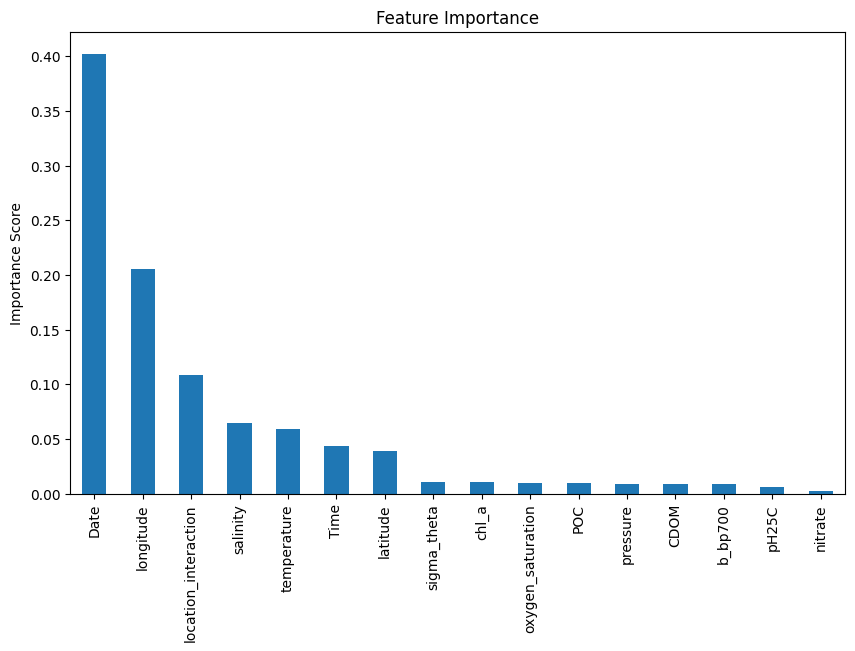

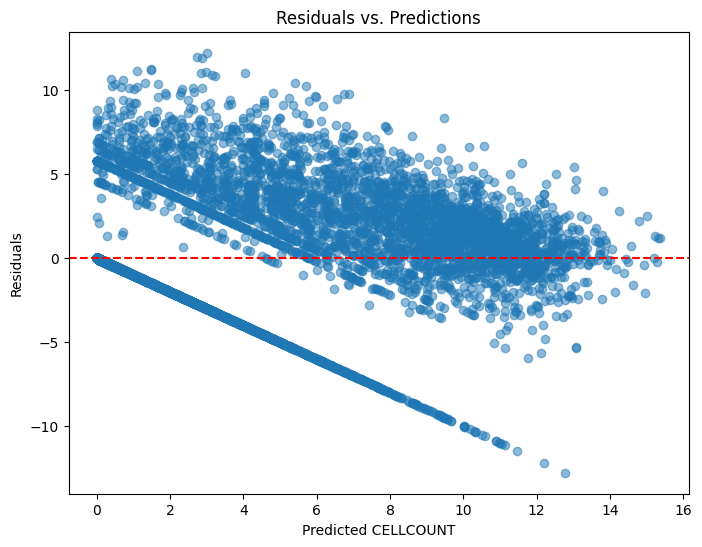

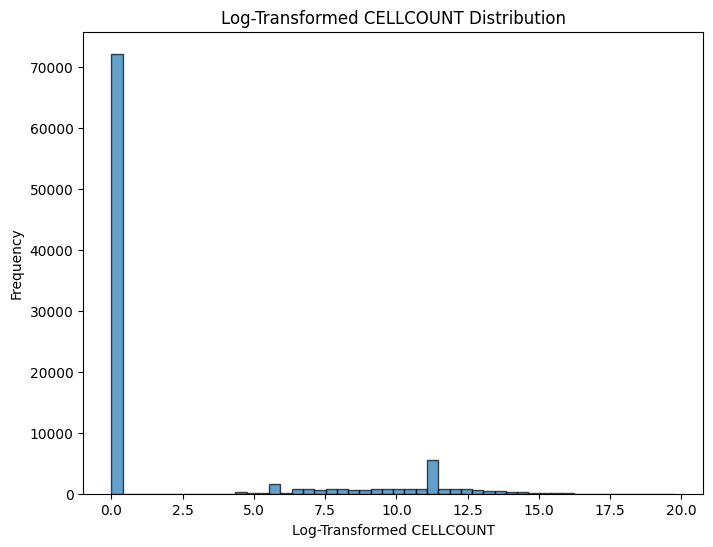

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Team15-Biointerphase/Dataset/habsos_water_predictions_4.csv')

# Drop unnecessary columns
df = df.drop(columns=['CATEGORY'], errors='ignore')  # Drop CATEGORY column
liar_columns = [col for col in df.columns if 'LIAR' in col]
df = df.drop(columns=liar_columns, errors='ignore')  # Drop LIAR columns

# Fill missing numeric values with column means
df = df.fillna(df.mean())

# Log-transform the target variable to reduce skewness
df['CELLCOUNT'] = np.log1p(df['CELLCOUNT'])  # Log-transform CELLCOUNT (log(1 + CELLCOUNT))

# Drop low-importance features (based on previous analysis)
low_importance_features = ['depth', 'oxygen', 'pH_insitu']
df = df.drop(columns=low_importance_features, errors='ignore')

# Feature engineering: Combine latitude and longitude into a single feature
df['location_interaction'] = df['latitude'] * df['longitude']

# Separate features (X) and target (y)
y = df['CELLCOUNT']
X = df.drop(columns=['CELLCOUNT'])

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Model: Mean predictor
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train_scaled, y_train)
baseline_pred = baseline.predict(X_test_scaled)
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print("Baseline Mean Absolute Error:", baseline_mae)
print("Baseline R-squared:", baseline_r2)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest R-squared:", rf_r2)

# Feature importance visualization
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predictions")
plt.xlabel("Predicted CELLCOUNT")
plt.ylabel("Residuals")
plt.show()

# Distribution of the log-transformed target variable
plt.figure(figsize=(8, 6))
plt.hist(y, bins=50, edgecolor='k', alpha=0.7)
plt.title("Log-Transformed CELLCOUNT Distribution")
plt.xlabel("Log-Transformed CELLCOUNT")
plt.ylabel("Frequency")
plt.show()


In [15]:
# Add Date and Location columns to the results DataFrame
results = pd.DataFrame({
    'Date': X_test['Date'].values,  # Include Date from X_test
    'Latitude': X_test['latitude'].values,  # Include Latitude from X_test
    'Longitude': X_test['longitude'].values,  # Include Longitude from X_test
    'True_CELLCOUNT': np.expm1(y_test),  # Revert log-transform to original scale
    'Predicted_CELLCOUNT': np.expm1(y_pred)  # Revert log-transform to original scale
})

# Save the modified DataFrame for further visualization
results.to_csv('/content/drive/My Drive/Team15-Biointerphase/Dataset/model_predictions_with_location.csv', index=False)
print("Updated results saved with Date and Location context.")


KeyError: 'Date'

In [13]:
import pandas as pd
from datetime import datetime, timedelta

# Example DataFrame with serial dates
df = pd.DataFrame({
    'Serial_Date': [738369, 736740, 718434, 733792, 737467]
})

# Define the base date (January 1, 1900)
base_date = datetime(1900, 1, 1)

# Convert serial dates to standard dates
df['Formatted_Date'] = df['Serial_Date'].apply(lambda x: (base_date + timedelta(days=x - 2)).strftime('%m-%d-%Y'))

# Display the updated DataFrame
print(df)


   Serial_Date Formatted_Date
0       738369     08-01-3921
1       736740     02-14-3917
2       718434     01-01-3867
3       733792     01-19-3909
4       737467     02-11-3919


In [17]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Add Date and Location columns to the results DataFrame
results = pd.DataFrame({
    'Date': X_test['Date'].values,  # Include Date from X_test
    'Latitude': X_test['latitude'].values,  # Include Latitude from X_test
    'Longitude': X_test['longitude'].values,  # Include Longitude from X_test
    'True_CELLCOUNT': np.expm1(y_test),  # Revert log-transform to original scale
    'Predicted_CELLCOUNT': np.expm1(y_pred)  # Revert log-transform to original scale
})

# Correct Date formatting assuming days since 1900-01-01 with proper handling of offsets
base_date = datetime(1900, 1, 1)
results['Date'] = results['Date'].apply(lambda x: (base_date + timedelta(days=x - 693594)).strftime('%m-%d-%Y'))

# Save the modified DataFrame for further visualization
results.to_csv('/content/drive/My Drive/Team15-Biointerphase/Dataset/model_predictions_with_corrected_date.csv', index=False)
print("Updated results saved with corrected Date, Location, and CELLCOUNT context.")


Updated results saved with corrected Date, Location, and CELLCOUNT context.
